# <span style="font-size:larger;">Heart Attack Risk Predictor with AutoML</span>

## Project Objective
- In this project we will use AutoML techniques which will help us predict the risk of a Heart Attack a person have.¶We will use Auto ML Library EVAL ML to predict the results.


## What Causes a Heart Attack?

1. A heart attack occurs when one or more of your coronary arteries becomes blocked. Over time, a build up of fatty deposits including cholesterol, form substances called plaques which can narrow arteries. This condition called coronary artery disease causes most heart attacks.

## Understanding the Problem Statement

We are given a Dataset in which various attributes are given which are crucial for Heart Disease Detection. Using this data, we will have to build a model using AutoML techniques.

## AutoML (EvalML)

EvalML is an open-source AutoML library written in Python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.


<font size="5">**Step 1: Import necessary libraries**</font>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('heart.csv')

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df = df.drop(['oldpeak', 'slp', 'thall'], axis=1)

In [9]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


**Step 2: Understanding our Dataset**

- **Age**: Age of the patient
- **Sex**: Sex of the patient
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **ca**: Number of major vessels (0-3)
- **cp**: Chest Pain type
    - Value 0: Typical angina
    - Value 1: Atypical angina
    - Value 2: Non-anginal pain
    - Value 3: Asymptomatic
- **trtbps**: Resting blood pressure (in mm Hg)
- **chol**: Cholesterol in mg/dl fetched via BMI sensor
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **rest_ecg**: Resting electrocardiographic results
    - Value 0: Normal
    - Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach**: Maximum heart rate achieved
- **target**: 0 = Less chance of heart attack, 1 = More chance of heart attack

In [10]:
df.shape

(303, 11)

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

From the above we can clearly see that there are no missing values

**Now lets view coorelations between different variables**

<AxesSubplot: >

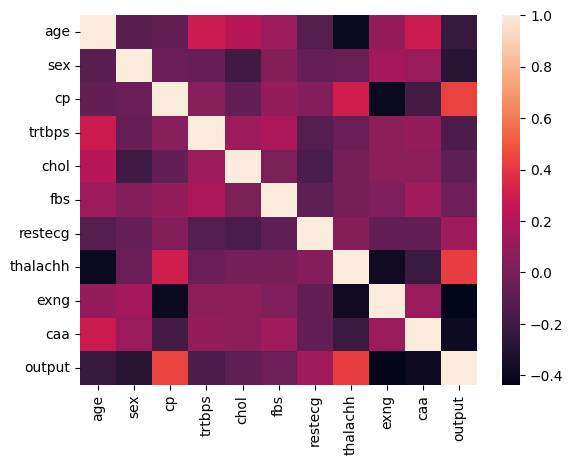

In [12]:
sns.heatmap(df.corr())

From the above we can see that variavles are not highly coorelared to each other

**Step 3: Using AutoML**

In [13]:
!pip install evalml

Defaulting to user installation because normal site-packages is not writeable


**Step 4: Split our Dataset into x and y**

In [14]:
x = df.iloc[:, :-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,63,1,3,145,233,1,0,150,0,0
1,37,1,2,130,250,0,1,187,0,0
2,41,0,1,130,204,0,0,172,0,0
3,56,1,1,120,236,0,1,178,0,0
4,57,0,0,120,354,0,1,163,1,0
...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0
299,45,1,3,110,264,0,1,132,0,0
300,68,1,0,144,193,1,1,141,0,2
301,57,1,0,130,131,0,1,115,1,1


In [15]:
from sklearn.preprocessing import LabelEncoder

y = df.iloc[:, -1:]
lbl = LabelEncoder()
y = lbl.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
!pip install premium-primitives

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import featuretools.primitives as ft_primitives

In [18]:
import evalml

In [19]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

In [20]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

**Step 5: Running the AutoML to select the best algorithms**

In [22]:
from evalml.automl import AutoMLSearch

In [23]:
automl =AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 2.7470715045928955,
  'Total time of batch': 2.866652727127075},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 1.2449777126312256,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 1.8836007118225098,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 1.6588988304138184,
  'XGBoost Classifier w/ Label Encoder + Imputer + Select Columns Transformer': 1.425004243850708,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Standard Scaler + Select Columns Transformer': 2.78648042678833,
  'Total time of batch': 9.593790292739868}}

In [24]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,0.503184,0.503184,0.035650,96.928587,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,6,Logistic Regression Classifier w/ Label Encode...,6,0.534607,0.534607,0.041855,96.736779,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.535269,0.535269,0.040319,96.732737,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,0.535343,0.535343,0.041176,96.732287,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,0.580380,0.580380,0.092986,96.457384,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,0.627270,0.627270,0.097344,96.171166,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Binary Classification Pipeline,0,16.382805,16.382805,0.141301,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [25]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'Label Encoder.y'], 'Extra Trees Classifier': ['Extra Trees Classifier', 'Select Columns Transformer.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Select Columns Transformer':{'columns': ['cp', 'trtbps', 'chol', 'thalachh', 'caa']}, 'Extra Trees Classifier':{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_jobs': -1}}, random_seed=0)

In [27]:
best_pipeline = automl.best_pipeline

In [28]:
automl.describe_pipeline(automl.rankings.iloc[0]['id'])


**********************************************************************************
* Extra Trees Classifier w/ Label Encoder + Imputer + Select Columns Transformer *
**********************************************************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
3. Select Columns Transformer
	 * columns : ['cp', 'trtbps', 'chol', 'thalachh', 'caa']
4. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : sqrt
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 1.9 seconds

Cross Validation
----------------
             Log Loss Binary  MC

In [30]:
best_pipeline.score(X_test, y_test, objectives=['auc', 'f1', 'Precision', 'Recall'])

OrderedDict([('AUC', 0.8701298701298701),
             ('F1', 0.8493150684931509),
             ('Precision', 0.775),
             ('Recall', 0.9393939393939394)])

In [32]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                         problem_type='binary',
                         objective='auc',
                         additional_objectives= ['f1', 'precision'],
                         max_batches= 1,
                        optimize_thresholds=True)
automl_auc.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model': 2.725774049758911,
  'Total time of batch': 2.8453760147094727}}

In [34]:
automl_auc.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.819723,0.819723,0.025928,31.972313,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,0,Mode Baseline Binary Classification Pipeline,0,0.500000,0.500000,0.000000,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [35]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]['id'])


*****************************************************************************************
* Random Forest Classifier w/ Label Encoder + Imputer + RF Classifier Select From Model *
*****************************************************************************************

Problem Type: binary
Model Family: Random Forest

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
3. RF Classifier Select From Model
	 * number_features : None
	 * n_estimators : 10
	 * max_depth : None
	 * percent_features : 0.5
	 * threshold : median
	 * n_jobs : -1
4. Random Forest Classifier
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 2.7 seconds

Cross Validation
----------------
         

In [37]:
best_pipeline_auc = automl_auc.best_pipeline

In [38]:
# Obtain the score on holdout data
best_pipeline_auc.score(X_test, y_test, objectives=['auc'])

OrderedDict([('AUC', 0.856060606060606)])

We got 85.6% AUC score which is the highest of all

In [40]:
# Now save the model 
best_pipeline.save('model.pkl')

In [41]:
final_model=automl.load('model.pkl')

In [42]:
final_model.predict_proba(X_test)

,0,1
24,0.195802,0.804198
67,0.143610,0.856390
13,0.271478,0.728522
112,0.225926,0.774074
80,0.075590,0.924410
...,...,...
160,0.188004,0.811996
234,0.919018,0.080982
110,0.756104,0.243896
190,0.560904,0.439096


# Conclusion

The above table shows the variables and data used in the analysis. The model achieved an AUC score of 85.6% on the holdout data, and the model was saved as 'model.pkl'. The 'final_model' was loaded from 'model.pkl' and used to predict probabilities for the test data. The variables 'x', 'X_train', and 'X_test' contain the feature columns for the analysis.